<a href="https://colab.research.google.com/github/noeljaymon/SBSPS-Challenge-1160-Predicting-the-energy-output-of-wind-turbine-based-on-weather-condition/blob/master/IBM_HACK_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv('/content/drive/My Drive/IBM Hack2020/T1.csv')

In [ ]:
df.values[0][1]

380.047790527343

In [ ]:

import dateutil
df['Date'] = df['Date/Time'].apply(dateutil.parser.parse, dayfirst=True)

In [ ]:
from datetime import datetime
df['Date/error']=pd.to_datetime(df['Date/Time'],errors='coerce').isnull()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date/Time                      50530 non-null  object        
 1   LV ActivePower (kW)            50530 non-null  float64       
 2   Wind Speed (m/s)               50530 non-null  float64       
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64       
 4   Wind Direction (°)             50530 non-null  float64       
 5   Date                           50530 non-null  datetime64[ns]
 6   Date/error                     50530 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(4), object(1)
memory usage: 2.4+ MB


In [ ]:
df.describe(include='all')

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Date,Date/error
count,50530,50530.000000,50530.000000,50530.000000,50530.000000,50530,50530
unique,50530,NaN,NaN,NaN,NaN,50530,1
top,09 02 2018 21:30,NaN,NaN,NaN,NaN,2018-12-22 10:10:00,False
freq,1,NaN,NaN,NaN,NaN,1,50530
first,NaN,NaN,NaN,NaN,NaN,2018-01-01 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,2018-12-31 23:50:00,NaN
mean,NaN,1307.684332,7.557952,1492.175463,123.687559,NaN,NaN
std,NaN,1312.459242,4.227166,1368.018238,93.443736,NaN,NaN
min,NaN,-2.471405,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,50.677890,4.201395,161.328167,49.315437,NaN,NaN


In [ ]:
ap_neg=df.loc[df['LV ActivePower (kW)']<0]
ap_neg.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,57.000000,57.000000,57.000000,57.000000
mean,-0.325730,2.807465,12.856540,158.625817
std,0.401506,0.441974,36.387774,84.839975
min,-2.471405,1.973656,0.000000,7.084192
25%,-0.456533,2.574092,0.000000,92.270073
50%,-0.166333,2.733283,0.000000,137.306000
75%,-0.095733,3.047134,17.686014,238.410294
max,-0.000467,4.591375,241.595226,330.001099


In [ ]:
ws=df['Wind Speed (m/s)']
wd=df['Wind Direction (°)']

# ws=0 , wd= 0 , ap=0,   -----------10
# *ws=0, wd=!0, ap=0,     -----------0
# ws!=0, wd=0, ap=0,     -----------63
# ws=!0, wd=!0, ap=0,    -----------10708
# ws=0 , wd= 0 , ap!=0,  -----------0
# *ws=0, wd=!0, ap!=0,    -----------0 
# ws!=0, wd=0, ap!=0,    -----------2
# ws=!0, wd=!0, ap!=0,   -----------39747

In [ ]:
ap_0=df.loc[((df['Wind Speed (m/s)']!=0) & (df['Wind Direction (°)']!=0))&(df['LV ActivePower (kW)']==0)]
ap_1=df.loc[((df['Wind Speed (m/s)']!=0) & (df['Wind Direction (°)']!=0))&(df['LV ActivePower (kW)']!=0)]

In [ ]:
l=ap_0['Wind Direction (°)'].values
m=ap_0['Wind Speed (m/s)'].values
n=ap_1['Wind Direction (°)'].values
o=ap_1['Wind Speed (m/s)'].values
len(l)
len(m)
len(o)

39747

In [ ]:
count=0
for row in range(len(l)):
  for j in range(len(n)):
    if (l[row]==n[j])|(m[row]==o[j]):
      #print(l[row],n[j],m[row],o[j])
      count+=1
print(count)

67


In [ ]:
count=0
for row in range(len(l)):
  for j in range(len(n)):
    if (l[row]==n[j])|(m[row]==o[j]):
      #print(l[row],n[j],m[row],o[j])
      count+=1
print(count)

208.40100097656202 208.40100097656202 4.620684146881099 7.90467119216918
199.848495483398 199.848495483398 2.1188189983367898 6.19436883926391
37.6059494018554 37.6059494018554 8.33540153503417 3.45522093772888
204.709396362304 44.7578010559082 13.1138896942138 13.1138896942138
202.955703735351 202.955703735351 12.7185497283935 10.1298398971557
196.661102294921 196.661102294921 15.7012701034545 11.2719001770019
39.1127815246582 84.15204620361321 10.5583295822143 10.5583295822143
34.8240089416503 34.8240089416503 7.272953987121579 16.3628902435302
236.451995849609 311.658294677734 12.137419700622498 12.137419700622498
247.256805419921 247.256805419921 13.0806703567504 5.485221862792961
77.00018310546871 75.789680480957 11.101019859313901 11.101019859313901
210.02850341796798 210.02850341796798 1.06616103649139 8.08517265319824
64.3709716796875 60.776309967040994 10.7505598068237 10.7505598068237
58.2406997680664 58.2406997680664 8.44081020355224 10.5834598541259
175.67919921875 175.6791

In [ ]:
wd.value_counts().to_frame()

,Wind Direction (°)
0.000000,75
203.142303,3
214.885101,3
58.240700,2
210.482407,2
...,...
197.871307,1
69.435577,1
35.917191,1
190.873596,1


In [ ]:
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Date,Date/error
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,2018-01-01 00:00:00,2018-01-01 00:00:00
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,2018-01-01 00:10:00,2018-01-01 00:10:00
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,2018-01-01 00:20:00,2018-01-01 00:20:00
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,2018-01-01 00:30:00,2018-01-01 00:30:00
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,2018-01-01 00:40:00,2018-01-01 00:40:00


In [ ]:
df.shape

(50530, 11)

In [ ]:
df.tail()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Date,Date/error,Hour,Minute,Day,Month,weekday
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724,2018-12-31 23:10:00,False,23,10,31,December,Monday
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599,2018-12-31 23:20:00,False,23,20,31,December,Monday
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500,2018-12-31 23:30:00,False,23,30,31,December,Monday
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913,2018-12-31 23:40:00,False,23,40,31,December,Monday
50529,31 12 2018 23:50,2820.466064,9.979332,2779.184096,82.274620,2018-12-31 23:50:00,False,23,50,31,December,Monday


In [ ]:
df['Hour']=df['Date'].dt.hour
df['Minute']=df['Date'].dt.minute
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month_name()
df['weekday']=df['Date'].dt.day_name()

In [ ]:
df1=df.loc[df['Month']=='January']
df2=df.loc[df['Month']=='February']
df3=df.loc[df['Month']=='March']
df4=df.loc[df['Month']=='April']
df5=df.loc[df['Month']=='May']
df6=df.loc[df['Month']=='June']
df7=df.loc[df['Month']=='July']
df8=df.loc[df['Month']=='August']
df9=df.loc[df['Month']=='September']
df10=df.loc[df['Month']=='October']
df11=df.loc[df['Month']=='November']
df12=df.loc[df['Month']=='December']

In [ ]:
df1=df[:46227]
df10=df[38200:42283]#october

In [ ]:

df3.tail()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Date,Hour,Minute,Day,Month,weekday
46510,03 12 2018 23:10,75.753983,3.199438,25.564063,105.378304,2018-03-12 23:10:00,23,10,12,March,Monday
46511,03 12 2018 23:20,301.076813,4.316453,184.126718,101.967697,2018-03-12 23:20:00,23,20,12,March,Monday
46512,03 12 2018 23:30,838.124817,6.480738,798.476974,103.021698,2018-03-12 23:30:00,23,30,12,March,Monday
46513,03 12 2018 23:40,1433.562988,7.803647,1419.638772,104.378197,2018-03-12 23:40:00,23,40,12,March,Monday
46514,03 12 2018 23:50,1182.406982,7.036990,1032.727674,104.295502,2018-03-12 23:50:00,23,50,12,March,Monday


# No of entries per Month
January-3695,
February-3898,
March-4379,
April-4231,
May- 4460,
June-4279,
July-4464,
August-4428,
September-4001,
October-4426,
November-3960,
December-4309,

# Zero Theoretical value per Month
Jan 306 
 Feb 554 
 March 408 
 April 822 
 May 803 
 June 886 
 July 1198 
 Aug 253 
 Sept 490 
 Oct 736 
 Nov 440 
 Dec 853
 #  Zero Active value per Month out of zero theoretical
  Jan 293 
 Feb 506 
 March 369 
 April 777 
 May 762 
 June 832 
 July 1136 
 Aug 224 
 Sept 437 
 Oct 697 
 Nov 414 
 Dec 837

#zero active power total 
Jan 1096 
 Feb 964 
 March 553 
 April 1061 
 May 1039 
 June 982 
 July 1357 
 Aug 310 
 Sept 600 
 Oct 843 
 Nov 520 
 Dec 1456
 # 57 negative ap thus 21.44% (10838)of dataset consists of zero and negative ap

In [ ]:
print(' Jan',df1.shape[0],'\n Feb',df2.shape[0],'\n March',df3.shape[0],'\n April',df4.shape[0],'\n May',df5.shape[0],'\n June',df6.shape[0],'\n July',df7.shape[0],'\n Aug',df8.shape[0],'\n Sept',df9.shape[0],'\n Oct',df10.shape[0],'\n Nov',df11.shape[0],'\n Dec',df12.shape[0])

 Jan 293 
 Feb 964 
 March 553 
 April 1061 
 May 1039 
 June 982 
 July 1357 
 Aug 310 
 Sept 600 
 Oct 843 
 Nov 520 
 Dec 1456


In [ ]:
df1=df1.loc[df1['Theoretical_Power_Curve (KWh)']==0]
df2=df2.loc[df2['LV ActivePower (kW)']==0]
df3=df3.loc[df3['LV ActivePower (kW)']==0]
df4=df4.loc[df4['LV ActivePower (kW)']==0]
df5=df5.loc[df5['LV ActivePower (kW)']==0]
df6=df6.loc[df6['LV ActivePower (kW)']==0]
df7=df7.loc[df7['LV ActivePower (kW)']==0]
df8=df8.loc[df8['LV ActivePower (kW)']==0]
df9=df9.loc[df9['LV ActivePower (kW)']==0]
df10=df10.loc[df10['LV ActivePower (kW)']==0]
df11=df11.loc[df11['LV ActivePower (kW)']==0]
df12=df12.loc[df12['LV ActivePower (kW)']==0]

In [ ]:
df1.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Date,Hour,Minute,Day,Month,weekday
2034,15 01 2018 06:40,0.0,2.882283,0.0,72.753616,2018-01-15 06:40:00,6,40,15,January,Monday
2035,15 01 2018 06:50,0.0,2.308273,0.0,81.607857,2018-01-15 06:50:00,6,50,15,January,Monday
2036,15 01 2018 07:00,0.0,2.361096,0.0,111.542198,2018-01-15 07:00:00,7,0,15,January,Monday
2037,15 01 2018 07:10,0.0,2.063914,0.0,120.515503,2018-01-15 07:10:00,7,10,15,January,Monday
2038,15 01 2018 07:20,0.0,2.544577,0.0,121.121300,2018-01-15 07:20:00,7,20,15,January,Monday


In [ ]:
df1.shape

(293, 11)

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     / 48.9MB 777kB/s
     |████████████████████████████████| 71kB 2.1MB/s 
     |████████████████████████████████| 61kB 4.9MB/s 
     |████████████████████████████████| 604kB 19.2MB/s 
     |████████████████████████████████| 3.1MB 27.5MB/s 
     |████████████████████████████████| 71kB 7.9MB/s 
     |████████████████████████████████| 296kB 46.0MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.8.0-py2.py3-none-any.whl size=259932 sha256=2f58aa3a9131f62c9fadebe9cb844aaf80ee52aff48b8a76894462d742f78ab4
  Stored in directory: /tmp/pip-ephem-wheel-cache-a1ztfg2c/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=0554bacb07b4f713611ad29854fb70cb48ee47b1ff038102a2a8a84b49682026
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=2919

In [ ]:
#total hours has to be 186 oobservations per hour for a month of 31 days(6 *31)
#minutes has to have 744 observation per hour (24*31)

In [ ]:
df1.Minute.value_counts().to_frame()

,Minute


In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df1, title='Pandas Profiling Report', html={'style':{'full_width':False}})

In [ ]:
profile.to_notebook_iframe()

ValueError: ignored

In [ ]:
df.drop(columns=['Theoretical_Power_Curve (KWh)'])

,LV ActivePower (kW),Wind Speed (m/s),Wind Direction (°)
Date/Time,,,
01 01 2018 00:00,380.047791,5.311336,259.994904
01 01 2018 00:10,453.769196,5.672167,268.641113
01 01 2018 00:20,306.376587,5.216037,272.564789
01 01 2018 00:30,419.645905,5.659674,271.258087
01 01 2018 00:40,380.650696,5.577941,265.674286
...,...,...,...
31 12 2018 23:10,2963.980957,11.404030,80.502724
31 12 2018 23:20,1684.353027,7.332648,84.062599
31 12 2018 23:30,2201.106934,8.435358,84.742500


In [ ]:
y=df['LV ActivePower (kW)']
df.drop(columns=['LV ActivePower (kW)'],axis=1,inplace=True)

In [ ]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()



In [ ]:
from sklearn.ensemble import RandomForestRegressor
y=df['LV ActivePower (kW)']
df.drop(columns=df[['LV ActivePower (kW)','Date/Time','Theoretical_Power_Curve (KWh)']],inplace=True)
df.head()

,Wind Speed (m/s),Wind Direction (°)
0,5.311336,259.994904
1,5.672167,268.641113
2,5.216037,272.564789
3,5.659674,271.258087
4,5.577941,265.674286


In [ ]:
y_train=y[:42283]
y_test=y[42283:]
X_train=df.iloc[:42283]
X_test=df.iloc[42283:]

In [ ]:
X_test.shape

(8247, 2)

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
model=XGBRegressor()

In [ ]:
model=RandomForestRegressor(n_estimators=100)

In [ ]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
count=0
for i in range(len(y)):
  if y[i]<0:
    count+=1
print(count)

57


In [ ]:
y_test

42283       0.000000
42284       0.000000
42285      58.171120
42286      78.055687
42287      83.602211
            ...     
50525    2963.980957
50526    1684.353027
50527    2201.106934
50528    2515.694092
50529    2820.466064
Name: LV ActivePower (kW), Length: 8247, dtype: float64

In [ ]:
y_pred

array([-6.6139803e+00,  1.7508795e+00,  9.4359093e+01, ...,
        1.5329069e+03,  2.0557791e+03,  2.2247944e+03], dtype=float32)

In [ ]:
y_pred  #rf

array([  21.47236066,   11.34124334,   74.63306957, ..., 1160.92030029,
       2211.21198486, 2275.84980713])

In [ ]:
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error

In [ ]:
r2_score(y_test,y_pred)

0.8192150727688418

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

583.9257250743193

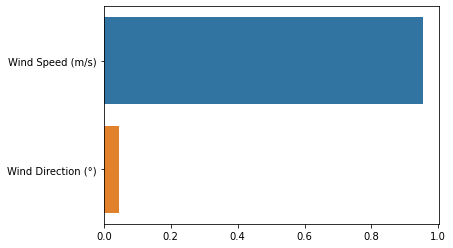

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(model.feature_importances_,df.columns)

2